Desafios desta aula

1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)

2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)

4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)

5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)


In [32]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [33]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [34]:
#aqui eu percebi que o Rua e Bairro tem dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [35]:
dados.sample(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5578,NaN,Vila Ida,São Paulo,460,3,4,5,R$ 2.600.000
2365,NaN,Vila Ida,São Paulo,440,4,6,6,R$ 5.750.000
4989,NaN,Jardim Guedala,São Paulo,496,4,1,4,R$ 3.000.000
9859,Alameda Tirió,Planalto Paulista,São Paulo,300,3,3,3,R$ 2.600.000
143,Rua Américo Brasiliense,Alto da Boa Vista,São Paulo,340,4,6,7,R$ 2.200.000


In [36]:
#realizando a média da metragem para cada um dos bairros.
#essa é a metragem total
dados['Metragem'].mean()

442.30065947242207

In [37]:
#precisamos separar por bairro
dados['Bairro']

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [38]:
#agora eu quero a média da metragem dos apartamentos na Vila Mariana
#primeiro eu descubro quantos apts temos na Vila mariana registrados nos nossos dados
sum((dados['Bairro'] == 'Vila Mariana'))

184

In [39]:
tem_imoveis_vila = (dados['Bairro'] == 'Vila Mariana')
tem_imoveis_vila
#o que eu fiz aqui foi descobrir quais linhas estão na Vila Mariana, ele fez o TRUE e FALSE

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [40]:
#agora ele trouxe só os 184 imoveis
imoveis_vila_mariana = dados[tem_imoveis_vila]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [41]:
#pronto, agora eu tenho a média somente dos imoveis VM
#CUIDADO! nem sempre essa média é representativa, talvez tenha outliers
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

In [42]:
n_imoveis_bairro = dados.Bairro.value_counts()
n_imoveis_bairro

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

<AxesSubplot:>

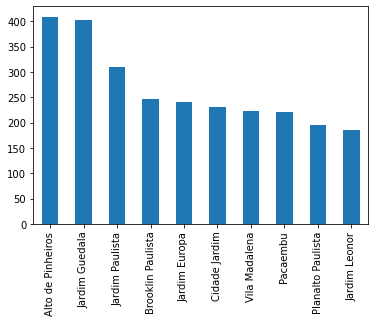

In [43]:
n_imoveis_bairro.head(10).plot.bar()

# Desafio 01

In [44]:
#1 ------>  Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)

In [51]:
#Primeiro eu vou criar um grupo
n_de_bairros = dados.groupby('Bairro')
n_de_bairros.groups

{'Aclimação': [269, 670, 1265, 1287, 1347, 1663, 1763, 2044, 2141, 2369, 2438, 2734, 2764, 2800, 2818, 2855, 3017, 3045, 3433, 3612, 3737, 3748, 3758, 3759, 3818, 3895, 3920, 4024, 4028, 4032, 4083, 4084, 4125, 4131, 4164, 4177, 4181, 4188, 4192, 4224, 4254, 4264, 4312, 4348, 4375, 4415, 4467, 4474, 4490, 4515, 4523, 4527, 4571, 4617, 4860, 4890, 4940, 4971, 4993, 5266, 5344, 5452, 5504, 5574, 5635, 5698, 5777, 5936, 6033, 6201, 6277, 6293, 6468, 6528, 6722, 6809, 6834, 7153, 7454, 7563, 8293, 9067, 9140, 9260, 9366, 9418, 9539, 9776], 'Alto da Boa Vista': [65, 143, 339, 3426, 4123, 5310, 6234, 8145], 'Alto da Lapa': [61, 86, 91, 158, 169, 236, 252, 321, 425, 440, 446, 459, 477, 500, 502, 917, 1225, 1588, 1795, 1838, 1932, 2028, 2068, 2127, 2167, 2171, 2233, 2705, 2840, 2949, 2982, 3129, 3359, 3602, 3641, 3684, 3864, 4203, 4499, 4551, 4630, 4689, 4915, 4934, 4963, 4986, 5263, 5268, 5365, 5392, 5488, 5558, 5786, 5867, 5945, 5992, 6027, 6168, 6300, 6334, 6391, 6516, 6604, 6693, 6716, 674

In [52]:
for bairro, data in n_de_bairros:
    print('{} -> {}'. format(bairro, data.Metragem.mean()))

Aclimação -> 253.0568181818182
Alto da Boa Vista -> 418.875
Alto da Lapa -> 294.33720930232556
Alto da Mooca -> 270.05
Alto de Pinheiros -> 433.4449877750611
Aricanduva -> 278.0
Balneário Mar Paulista -> 250.0
Barra Funda -> 135.44444444444446
Barro Branco (Zona Norte) -> 489.0
Bela Aliança -> 345.4761904761905
Bela Vista -> 190.0
Belenzinho -> 215.69230769230768
Boaçava -> 512.0260869565218
Bom Retiro -> 336.5
Bortolândia -> 151.66666666666666
Bosque da Saúde -> 247.59259259259258
Brasilândia -> 83.75
Brooklin -> 339.4166666666667
Brooklin Novo -> 290.3
Brooklin Paulista -> 323.6761133603239
Brás -> 181.25
Burgo Paulista -> 150.0
Butantã -> 381.45
Cambuci -> 203.63333333333333
Campininha -> 133.0
Campo Belo -> 279.6917808219178
Campo Grande -> 163.33333333333334
Campos Elíseos -> 530.0
Canindé -> 107.5
Capela do Socorro -> 120.0
Capão Redondo -> 125.0
Carandiru -> 382.0
Casa Verde -> 306.0
Casa Verde Alta -> 184.33333333333334
Catumbi -> 125.25
Caxingui -> 354.3809523809524
Cerqueira 

# Desafio 02 

In [60]:
#2-------> Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).

# Forma 1 

In [97]:
dados.query("Bairro == 'Vila Mariana'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


# Forma 2 

In [100]:
forma_2 = dados.groupby("Bairro")
forma_2.groups

{'Aclimação': [269, 670, 1265, 1287, 1347, 1663, 1763, 2044, 2141, 2369, 2438, 2734, 2764, 2800, 2818, 2855, 3017, 3045, 3433, 3612, 3737, 3748, 3758, 3759, 3818, 3895, 3920, 4024, 4028, 4032, 4083, 4084, 4125, 4131, 4164, 4177, 4181, 4188, 4192, 4224, 4254, 4264, 4312, 4348, 4375, 4415, 4467, 4474, 4490, 4515, 4523, 4527, 4571, 4617, 4860, 4890, 4940, 4971, 4993, 5266, 5344, 5452, 5504, 5574, 5635, 5698, 5777, 5936, 6033, 6201, 6277, 6293, 6468, 6528, 6722, 6809, 6834, 7153, 7454, 7563, 8293, 9067, 9140, 9260, 9366, 9418, 9539, 9776], 'Alto da Boa Vista': [65, 143, 339, 3426, 4123, 5310, 6234, 8145], 'Alto da Lapa': [61, 86, 91, 158, 169, 236, 252, 321, 425, 440, 446, 459, 477, 500, 502, 917, 1225, 1588, 1795, 1838, 1932, 2028, 2068, 2127, 2167, 2171, 2233, 2705, 2840, 2949, 2982, 3129, 3359, 3602, 3641, 3684, 3864, 4203, 4499, 4551, 4630, 4689, 4915, 4934, 4963, 4986, 5263, 5268, 5365, 5392, 5488, 5558, 5786, 5867, 5945, 5992, 6027, 6168, 6300, 6334, 6391, 6516, 6604, 6693, 6716, 674

# Desafio 03

In [64]:
#3 ----->Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão

<AxesSubplot:>

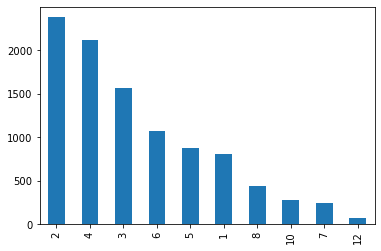

In [74]:
n_de_vagas = dados["Vagas"].value_counts()
n_de_vagas.head(10).plot.bar()

In [75]:
import seaborn as sns

C:\Users\GRAZIELLE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


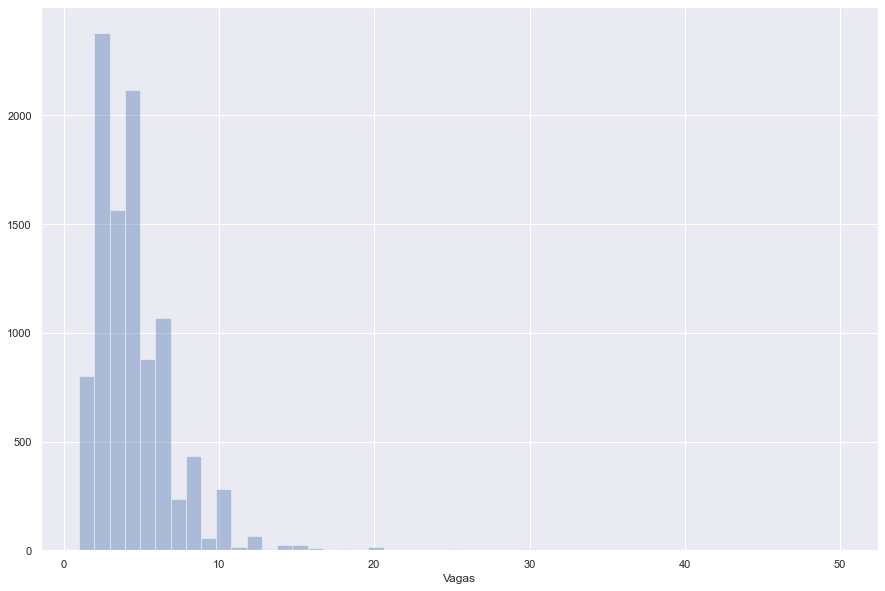

In [91]:
ax = sns.distplot(dados.Vagas, kde = False)




# Desafio 04

In [53]:
#4----->  Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)

# 1 forma

In [55]:
for bairro, data in n_de_bairros:
    print('{} -> {}'. format(bairro, data.Metragem.median()))

Aclimação -> 227.5
Alto da Boa Vista -> 378.0
Alto da Lapa -> 255.0
Alto da Mooca -> 182.5
Alto de Pinheiros -> 412.0
Aricanduva -> 278.0
Balneário Mar Paulista -> 250.0
Barra Funda -> 122.5
Barro Branco (Zona Norte) -> 600.0
Bela Aliança -> 300.0
Bela Vista -> 190.0
Belenzinho -> 230.0
Boaçava -> 440.0
Bom Retiro -> 336.5
Bortolândia -> 175.0
Bosque da Saúde -> 205.0
Brasilândia -> 85.0
Brooklin -> 268.0
Brooklin Novo -> 302.5
Brooklin Paulista -> 286.0
Brás -> 182.5
Burgo Paulista -> 150.0
Butantã -> 353.0
Cambuci -> 180.0
Campininha -> 133.0
Campo Belo -> 253.0
Campo Grande -> 140.0
Campos Elíseos -> 530.0
Canindé -> 107.5
Capela do Socorro -> 120.0
Capão Redondo -> 125.0
Carandiru -> 382.0
Casa Verde -> 306.0
Casa Verde Alta -> 223.0
Catumbi -> 125.5
Caxingui -> 313.0
Cerqueira César -> 145.5
Chora Menino -> 256.0
Chácara Belenzinho -> 125.0
Chácara Califórnia -> 130.0
Chácara Flora -> 1300.0
Chácara Inglesa -> 155.0
Chácara Japonesa -> 185.5
Chácara Jaraguá -> 602.5
Chácara Mafald

In [56]:
for bairro, data in n_de_bairros:
    print('{} -> {}'. format(bairro, data.Metragem.min()))

Aclimação -> 104
Alto da Boa Vista -> 315
Alto da Lapa -> 46
Alto da Mooca -> 84
Alto de Pinheiros -> 100
Aricanduva -> 278
Balneário Mar Paulista -> 250
Barra Funda -> 44
Barro Branco (Zona Norte) -> 215
Bela Aliança -> 144
Bela Vista -> 190
Belenzinho -> 124
Boaçava -> 200
Bom Retiro -> 334
Bortolândia -> 100
Bosque da Saúde -> 70
Brasilândia -> 80
Brooklin -> 80
Brooklin Novo -> 175
Brooklin Paulista -> 70
Brás -> 110
Burgo Paulista -> 150
Butantã -> 177
Cambuci -> 70
Campininha -> 102
Campo Belo -> 80
Campo Grande -> 100
Campos Elíseos -> 530
Canindé -> 105
Capela do Socorro -> 120
Capão Redondo -> 125
Carandiru -> 382
Casa Verde -> 306
Casa Verde Alta -> 102
Catumbi -> 120
Caxingui -> 110
Cerqueira César -> 120
Chora Menino -> 240
Chácara Belenzinho -> 80
Chácara Califórnia -> 120
Chácara Flora -> 632
Chácara Inglesa -> 80
Chácara Japonesa -> 115
Chácara Jaraguá -> 600
Chácara Mafalda -> 120
Chácara Meyer -> 263
Chácara Monte Alegre -> 100
Chácara Santo Antônio (Zona Leste) -> 123

In [57]:
for bairro, data in n_de_bairros:
    print('{} -> {}'. format(bairro, data.Metragem.max()))

Aclimação -> 1500
Alto da Boa Vista -> 595
Alto da Lapa -> 1133
Alto da Mooca -> 805
Alto de Pinheiros -> 1530
Aricanduva -> 278
Balneário Mar Paulista -> 250
Barra Funda -> 305
Barro Branco (Zona Norte) -> 605
Bela Aliança -> 655
Bela Vista -> 190
Belenzinho -> 335
Boaçava -> 1192
Bom Retiro -> 339
Bortolândia -> 180
Bosque da Saúde -> 650
Brasilândia -> 85
Brooklin -> 705
Brooklin Novo -> 377
Brooklin Paulista -> 874
Brás -> 250
Burgo Paulista -> 150
Butantã -> 1186
Cambuci -> 578
Campininha -> 164
Campo Belo -> 912
Campo Grande -> 250
Campos Elíseos -> 530
Canindé -> 110
Capela do Socorro -> 120
Capão Redondo -> 125
Carandiru -> 382
Casa Verde -> 306
Casa Verde Alta -> 228
Catumbi -> 130
Caxingui -> 800
Cerqueira César -> 404
Chora Menino -> 256
Chácara Belenzinho -> 305
Chácara Califórnia -> 140
Chácara Flora -> 1650
Chácara Inglesa -> 400
Chácara Japonesa -> 207
Chácara Jaraguá -> 605
Chácara Mafalda -> 505
Chácara Meyer -> 268
Chácara Monte Alegre -> 920
Chácara Santo Antônio (Zo

In [58]:
for bairro, data in n_de_bairros:
    print('{} -> {}'. format(bairro, data.Metragem.median()))

Aclimação -> 227.5
Alto da Boa Vista -> 378.0
Alto da Lapa -> 255.0
Alto da Mooca -> 182.5
Alto de Pinheiros -> 412.0
Aricanduva -> 278.0
Balneário Mar Paulista -> 250.0
Barra Funda -> 122.5
Barro Branco (Zona Norte) -> 600.0
Bela Aliança -> 300.0
Bela Vista -> 190.0
Belenzinho -> 230.0
Boaçava -> 440.0
Bom Retiro -> 336.5
Bortolândia -> 175.0
Bosque da Saúde -> 205.0
Brasilândia -> 85.0
Brooklin -> 268.0
Brooklin Novo -> 302.5
Brooklin Paulista -> 286.0
Brás -> 182.5
Burgo Paulista -> 150.0
Butantã -> 353.0
Cambuci -> 180.0
Campininha -> 133.0
Campo Belo -> 253.0
Campo Grande -> 140.0
Campos Elíseos -> 530.0
Canindé -> 107.5
Capela do Socorro -> 120.0
Capão Redondo -> 125.0
Carandiru -> 382.0
Casa Verde -> 306.0
Casa Verde Alta -> 223.0
Catumbi -> 125.5
Caxingui -> 313.0
Cerqueira César -> 145.5
Chora Menino -> 256.0
Chácara Belenzinho -> 125.0
Chácara Califórnia -> 130.0
Chácara Flora -> 1300.0
Chácara Inglesa -> 155.0
Chácara Japonesa -> 185.5
Chácara Jaraguá -> 602.5
Chácara Mafald

# 2ª Forma

In [92]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [94]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


# Desafio 5

In [96]:
sem_endereco=dados.Rua.isnull()
sem_endereco = dados['Bairro'][sem_endereco].value_counts()
sem_endereco

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64